In [44]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

In [2]:
dftree = pd.read_csv("weatherAUS_coast.csv")
dftree_ts = pd.read_csv("weatherAUS_ts.csv")

In [3]:
dftree.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Coastal
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,0


In [4]:
# Drop RISK_MM column:
# From Kaggle: "Note: You should exclude the variable Risk-MM when training a binary classification model. 
# Not excluding it will leak the answers to your model and reduce its predictability."
dftree = dftree.drop('RISK_MM', axis = 1)

In [5]:
dftree.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Coastal
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0


In [6]:
# Add month column from time series df
dftree['Month'] = dftree_ts.Month

In [7]:
dftree.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Coastal,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0,12


In [8]:
# Unnecessary columns in this run: Date, Location, Coastal
dftree = dftree.drop(['Date','Location','Coastal'], axis = 1)

In [9]:
dftree.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [10]:
dftree['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
dftree['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [11]:
dftree_corr = dftree[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am',\
                      'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',\
                      'Temp9am','Temp3pm','RainToday','RainTomorrow']].corr()
dftree_corr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.736267,0.104255,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.901813,0.708865,0.056185,0.083936
MaxTemp,0.736267,1.000000,-0.074839,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,0.887020,0.984562,-0.228884,-0.159237
Rainfall,0.104255,-0.074839,1.000000,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.011477,-0.079178,0.500997,0.239032
WindGustSpeed,0.177285,0.067690,0.133497,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.150258,0.032970,0.155490,0.234010
WindSpeed9am,0.176005,0.014680,0.086816,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.129298,0.005108,0.102267,0.090995
WindSpeed3pm,0.175749,0.050800,0.057759,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.163601,0.028567,0.080074,0.087817
Humidity9am,-0.234211,-0.505432,0.223725,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,-0.472826,-0.499777,0.353358,0.257161
Humidity3pm,0.005999,-0.509270,0.255312,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,-0.221467,-0.557989,0.378766,0.446160
Pressure9am,-0.451260,-0.332293,-0.168085,-0.457891,-0.227923,-0.295567,0.139519,-0.027449,1.000000,0.961348,-0.422773,-0.287301,-0.189804,-0.246371
Pressure3pm,-0.461623,-0.427279,-0.126728,-0.412922,-0.174916,-0.254988,0.186955,0.051840,0.961348,1.000000,-0.470325,-0.389863,-0.106298,-0.226031


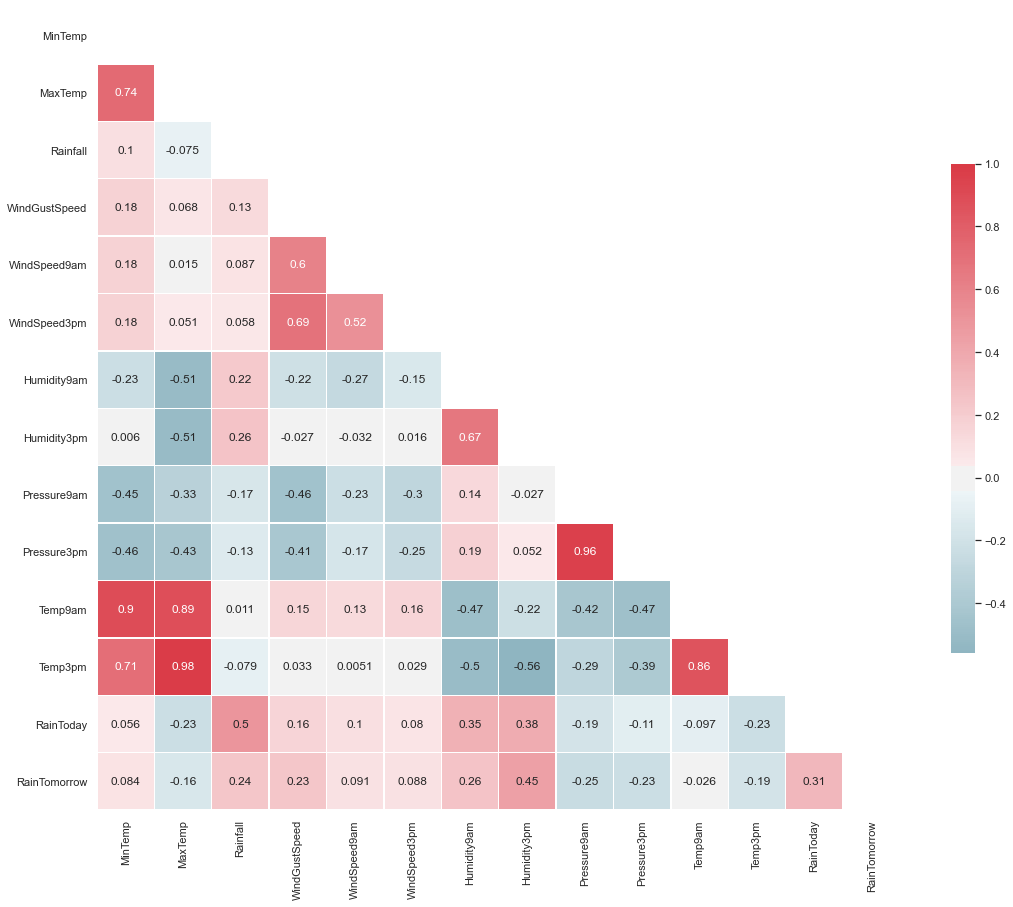

In [12]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(dftree_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dftree_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [13]:
# Could potentially remove one of the Pressure columns and one of the Temp columns, but it is not a perfect correlation.
# If anything I would remove the Temp 9am, as it is also highly correlated to MinTemp too

### One-hot encoding on categorical columns

In [14]:
dftree.dtypes == 'object'

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
Month            False
dtype: bool

In [15]:
dftree = pd.get_dummies(dftree, columns=['WindGustDir','WindDir9am','WindDir3pm'], drop_first = True)

In [16]:
dftree.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
dftree.isnull().sum()['Sunshine']

67816

In [18]:
# Evaporation, Sunshine, Cloud9am and Cloud3pm have many missing values, how many?

print('Evaporation has %.2f, Sunshine has %.2f, Cloud9am has %.2f, Cloud3pm has %.2f percent missing values.' %(dftree.isnull().sum()['Evaporation']/dftree.shape[0] * 100, dftree.isnull().sum()['Sunshine']/dftree.shape[0] * 100, dftree.isnull().sum()['Cloud9am']/dftree.shape[0] * 100, dftree.isnull().sum()['Cloud3pm']/dftree.shape[0] * 100))

Evaporation has 42.79, Sunshine has 47.69, Cloud9am has 37.74, Cloud3pm has 40.15 percent missing values.


In [19]:
# Drop these columns, as imputation would severely change results
dftree.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1, inplace = True)

In [20]:
dftree.isnull().sum()

MinTemp              637
MaxTemp              322
Rainfall            1406
WindGustSpeed       9270
WindSpeed9am        1348
WindSpeed3pm        2630
Humidity9am         1774
Humidity3pm         3610
Pressure9am        14014
Pressure3pm        13981
Temp9am              904
Temp3pm             2726
RainToday           1406
RainTomorrow           0
Month                  0
WindGustDir_ENE        0
WindGustDir_ESE        0
WindGustDir_N          0
WindGustDir_NE         0
WindGustDir_NNE        0
WindGustDir_NNW        0
WindGustDir_NW         0
WindGustDir_S          0
WindGustDir_SE         0
WindGustDir_SSE        0
WindGustDir_SSW        0
WindGustDir_SW         0
WindGustDir_W          0
WindGustDir_WNW        0
WindGustDir_WSW        0
WindDir9am_ENE         0
WindDir9am_ESE         0
WindDir9am_N           0
WindDir9am_NE          0
WindDir9am_NNE         0
WindDir9am_NNW         0
WindDir9am_NW          0
WindDir9am_S           0
WindDir9am_SE          0
WindDir9am_SSE         0


In [21]:
# imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
# census_data[['fnlwgt']] = imputer.fit_transform(census_data[['fnlwgt']])

In [22]:
dftree = dftree.dropna()

In [23]:
dftree.shape

(119590, 60)

In [24]:
dftree.isna().sum()
# All missing values accounted for

MinTemp            0
MaxTemp            0
Rainfall           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Month              0
WindGustDir_ENE    0
WindGustDir_ESE    0
WindGustDir_N      0
WindGustDir_NE     0
WindGustDir_NNE    0
WindGustDir_NNW    0
WindGustDir_NW     0
WindGustDir_S      0
WindGustDir_SE     0
WindGustDir_SSE    0
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
WindDir9am_ENE     0
WindDir9am_ESE     0
WindDir9am_N       0
WindDir9am_NE      0
WindDir9am_NNE     0
WindDir9am_NNW     0
WindDir9am_NW      0
WindDir9am_S       0
WindDir9am_SE      0
WindDir9am_SSE     0
WindDir9am_SSW     0
WindDir9am_SW      0
WindDir9am_W       0
WindDir9am_WNW     0
WindDir9am_WSW     0
WindDir3pm_ENE     0
WindDir3pm_ESE     0
WindDir3pm_N 

In [25]:
dftree.to_csv('weatherAUS_clean.csv', index = False)

# Test decision tree/forest with defaults, no hyperparameter tuning

In [383]:
from sklearn.model_selection import train_test_split

target = dftree['RainTomorrow']
features = dftree.drop(['RainTomorrow'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 12321)

In [384]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [385]:
y_predictDT = modelDT.predict(X_test)

In [386]:
accuracy_score(y_test, y_predictDT)

0.788694706915294

In [387]:
y_train_predictDT = modelDT.predict(X_train)

In [388]:
accuracy_score(y_train, y_train_predictDT)

1.0

In [389]:
confusion_matrix(y_test, y_predictDT)

array([[16034,  2644],
       [ 2410,  2830]], dtype=int64)

In [390]:
print(classification_report(y_test, y_predictDT))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18678
           1       0.52      0.54      0.53      5240

    accuracy                           0.79     23918
   macro avg       0.69      0.70      0.70     23918
weighted avg       0.79      0.79      0.79     23918



In [391]:
# In this situation, FP (precision) is predicting rain and it doesn't
# FN (recall) is predicting it won't rain, and it does. This is worse. Want high recall!

In [392]:
crossDT = cross_val_score(modelDT, X_test, y_test, cv=5)
crossDT.mean()

0.7871471704762617

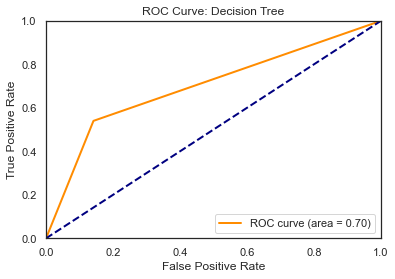

In [393]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predictDT)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Decision Tree')
plt.legend(loc = "lower right")
plt.show()

In [113]:
def class_model_summary(model_name, actual, predicted):
    
    print('Accuracy: %.8f ' % (accuracy_score(actual, predicted)))
    print(' ')
    print('Confusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    print(' ')
    print(classification_report(actual, predicted))
    print('Manually do the cross-validation score please')
    
    fpr, tpr, _ = metrics.roc_curve(actual, predicted)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc = "lower right")
    plt.show()

Accuracy: 0.78668785 
 
Confusion Matrix: 
[[15997  2681]
 [ 2421  2819]]
 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18678
           1       0.51      0.54      0.52      5240

    accuracy                           0.79     23918
   macro avg       0.69      0.70      0.69     23918
weighted avg       0.79      0.79      0.79     23918

Manually do the cross-validation score please


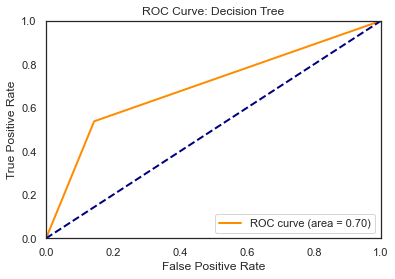

In [114]:
class_model_summary('Decision Tree', y_test, y_predictDT)

## Random Forest

In [86]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_predictRF = modelRF.predict(X_test)

In [99]:
print('Accuracy: %.8f ' % (accuracy_score(y_test, y_predictRF)))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predictRF))
print(classification_report(y_test, y_predictRF))

Accuracy: 0.85567355 
Confusion Matrix: 
[[17881   797]
 [ 2655  2585]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18678
           1       0.76      0.49      0.60      5240

    accuracy                           0.86     23918
   macro avg       0.82      0.73      0.76     23918
weighted avg       0.85      0.86      0.84     23918



In [93]:
# Cross-validated
crossRF = cross_val_score(modelRF, X_test, y_test, cv=5)
crossRF.mean()

0.8525795441911395

In [ ]:
# Cross-validation makes little difference for either DT or RF

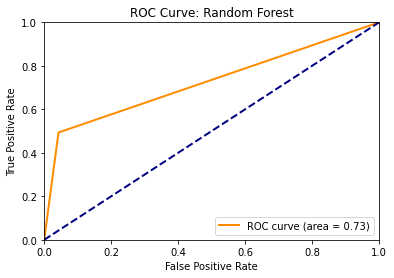

In [98]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predictRF)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend(loc = "lower right")
plt.show()

### So with only defaults and no balancing/over/undersampling, highest accuracy is 0.8557 RF, with AUC 0.73

## How unbalanced is the dataset?

In [27]:
dftree.RainTomorrow.value_counts()

0    93403
1    26187
Name: RainTomorrow, dtype: int64

In [29]:
dftreeraw = pd.read_csv("weatherAUS_coast.csv")

In [53]:
len(dftreeraw.Location.unique())

49

In [36]:
yesrain = dftreeraw.RainTomorrow.value_counts()

In [39]:
print('Yes to rain makes up %.2f percent of the data' %(yesrain[1] / yesrain.sum()))

Yes to rain makes up 0.22 percent of the data


Text(0.5, 0, ' ')

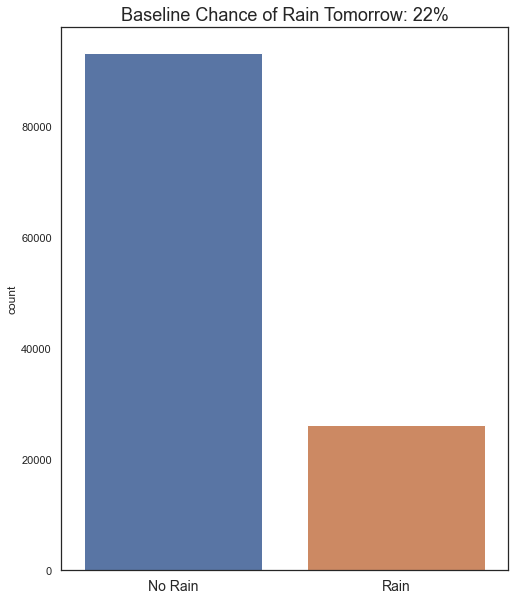

In [51]:
fig, ax = pyplot.subplots(figsize=(8,10))

sns.countplot(ax = ax, x = 'RainTomorrow', data = dftree)
plt.title('Baseline Chance of Rain Tomorrow: 22%', size = 18)
plt.xticks([0,1],["No Rain","Rain"], size = 14)
plt.xlabel(' ')

In [120]:
# This is not a balanced dataset. Let's use SMOTE to upsample the set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

### Oversampled Decision Tree

In [121]:
modelDT_smote = DecisionTreeClassifier()
modelDT_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [122]:
y_predictDT_smote = modelDT_smote.predict(X_test)

Accuracy: 0.77590100 
 
Confusion Matrix: 
[[15628  3050]
 [ 2310  2930]]
 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     18678
           1       0.49      0.56      0.52      5240

    accuracy                           0.78     23918
   macro avg       0.68      0.70      0.69     23918
weighted avg       0.79      0.78      0.78     23918

Manually do the cross-validation score please


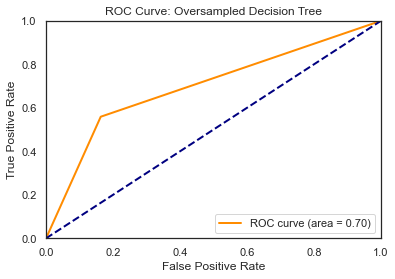

In [123]:
class_model_summary('Oversampled Decision Tree', y_test, y_predictDT_smote)

In [124]:
cross_val_score(modelDT_smote, X_test, y_test, cv=5).mean()

0.7857673183382898

In [125]:
# In this case, cross-validation does increase the accuracy

In [133]:
# Check for over/underfitting:
y_train_predictDT_smote = modelDT_smote.predict(X_train)

print('Training set score: {:.4f}'.format(accuracy_score(y_train, y_train_predictDT_smote)))

print('Test set score: {:.4f}'.format(accuracy_score(y_test, y_predictDT)))

Training set score: 1.0000
Test set score: 0.7867


In [ ]:
# Hmm definitely looks overfitted with a training score of 1.0

### Oversampled Random Forest

In [128]:
modelRF_smote = RandomForestClassifier()
modelRF_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [129]:
y_predictRF_smote = modelRF_smote.predict(X_test)

Accuracy: 0.85337403 
 
Confusion Matrix: 
[[17338  1340]
 [ 2167  3073]]
 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18678
           1       0.70      0.59      0.64      5240

    accuracy                           0.85     23918
   macro avg       0.79      0.76      0.77     23918
weighted avg       0.85      0.85      0.85     23918

Manually do the cross-validation score please


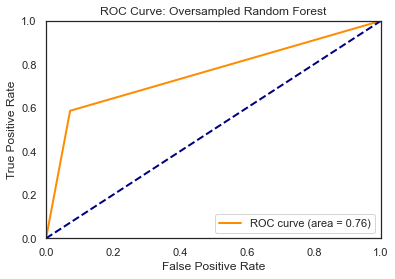

In [130]:
class_model_summary('Oversampled Random Forest', y_test, y_predictRF_smote)

In [131]:
cross_val_score(modelRF_smote, X_test, y_test, cv=5).mean()

0.8505307520293794

In [ ]:
# Cross-validation does not increase random forest

In [136]:
# Check for over/underfitting:
y_train_predictRF_smote = modelRF_smote.predict(X_train)

print('Training set score: {:.4f}'.format(accuracy_score(y_train, y_train_predictRF_smote)))

print('Test set score: {:.4f}'.format(accuracy_score(y_test, y_predictRF_smote)))

Training set score: 1.0000
Test set score: 0.8534


Accuracy: 0.82343841 
 
Confusion Matrix: 
[[16041  2637]
 [ 1586  3654]]
 
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     18678
           1       0.58      0.70      0.63      5240

    accuracy                           0.82     23918
   macro avg       0.75      0.78      0.76     23918
weighted avg       0.84      0.82      0.83     23918

Manually do the cross-validation score please


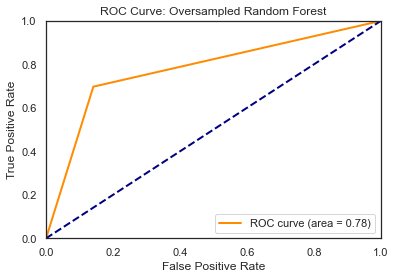

In [140]:
# Still looks overfitted, try reducing the tree depth

modelRF_smote10 = RandomForestClassifier(max_depth = 10, random_state = 12321)
modelRF_smote10.fit(X_train_smote, y_train_smote)

y_predictRF_smote10 = modelRF_smote10.predict(X_test)

class_model_summary('Oversampled Random Forest', y_test, y_predictRF_smote10)

In [138]:
cross_val_score(modelRF_smote10, X_test, y_test, cv=5).mean()

0.8473949946053365

In [ ]:
# Large increase in cross-validated accuracy

In [137]:
y_train_predictRF_smote10 = modelRF_smote10.predict(X_train)

print('Training set score: {:.4f}'.format(accuracy_score(y_train, y_train_predictRF_smote10)))

print('Test set score: {:.4f}'.format(accuracy_score(y_test, y_predictRF)))

Training set score: 0.8364
Test set score: 0.8557


In [143]:
# Much better, no longer overfitted!!


In [154]:
ft_imp = pd.DataFrame(data = modelRF_smote10.feature_importances_, index= dftree.drop(['RainTomorrow'], axis = 1).columns)

In [160]:
ft_imp.sort_values(by= 0, ascending = False)

,0
Humidity3pm,0.246132
Rainfall,0.178236
RainToday,0.130540
WindGustSpeed,0.064894
Humidity9am,0.056296
Pressure3pm,0.053806
Pressure9am,0.052171
Temp3pm,0.029863
MaxTemp,0.021512
MinTemp,0.016813


In [178]:
ft_imp[0].sum()

0.9999999999999999

In [182]:
ft_imp_top = ft_imp[ft_imp[0] > 0.01].sort_values(by=0)
ft_imp_top

,0
MinTemp,0.016813
MaxTemp,0.021512
Temp3pm,0.029863
Pressure9am,0.052171
Pressure3pm,0.053806
Humidity9am,0.056296
WindGustSpeed,0.064894
RainToday,0.130540
Rainfall,0.178236
Humidity3pm,0.246132


Text(0, 0.5, 'Feature')

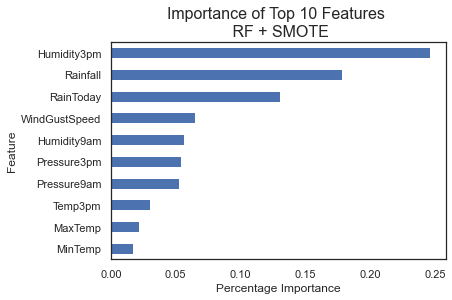

In [221]:
ft_imp_top.plot(kind = 'barh', legend = False)
plt.title('Importance of Top 10 Features \n RF + SMOTE', size = 16)
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')

## What about after regularisation?

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

dftree_reg = scaler.fit_transform(dftree)
dftreescaled = pd.DataFrame.from_records(dftree_reg, columns = dftree.columns)

dftreescaled

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.513064,0.446154,0.001632,0.294574,0.229885,0.275862,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.370546,0.494505,0.000000,0.294574,0.045977,0.252874,0.44,0.25,0.497521,0.4912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.501188,0.507692,0.000000,0.310078,0.218391,0.298851,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.413302,0.558242,0.000000,0.139535,0.126437,0.103448,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.271318,0.080460,0.229885,0.82,0.33,0.500826,0.4624,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119585,0.277910,0.421978,0.000000,0.193798,0.172414,0.149425,0.59,0.27,0.730579,0.7056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119586,0.261283,0.457143,0.000000,0.193798,0.149425,0.126437,0.51,0.24,0.728926,0.6912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119587,0.280285,0.498901,0.000000,0.124031,0.149425,0.103448,0.56,0.21,0.710744,0.6720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119588,0.323040,0.534066,0.000000,0.240310,0.103448,0.103448,0.53,0.24,0.669421,0.6352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [189]:
target2 = dftreescaled['RainTomorrow']
features2 = dftreescaled.drop(['RainTomorrow'], axis = 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 0.2, random_state = 12321)

Accuracy: 0.84982022 
 
Confusion Matrix: 
[[18059   619]
 [ 2973  2267]]
 
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     18678
         1.0       0.79      0.43      0.56      5240

    accuracy                           0.85     23918
   macro avg       0.82      0.70      0.73     23918
weighted avg       0.84      0.85      0.83     23918

Manually do the cross-validation score please


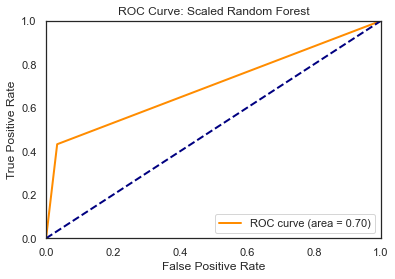

In [191]:
modelRF_scaled = RandomForestClassifier(max_depth = 10)
modelRF_scaled.fit(X_train2, y_train2)

y_predictRF_scaled = modelRF_scaled.predict(X_test2)

class_model_summary('Scaled Random Forest', y_test2, y_predictRF_scaled)

In [199]:
cross_val_score(modelRF_scaled, X_test2, y_test2, cv=5).mean()

0.8477294689875023

In [194]:
oversample = SMOTE()

X_train2_smote, y_train2_smote = oversample.fit_resample(X_train2, y_train2)

Accuracy: 0.81160632 
 
Confusion Matrix: 
[[15608  3070]
 [ 1436  3804]]
 
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.87     18678
         1.0       0.55      0.73      0.63      5240

    accuracy                           0.81     23918
   macro avg       0.73      0.78      0.75     23918
weighted avg       0.84      0.81      0.82     23918

Manually do the cross-validation score please


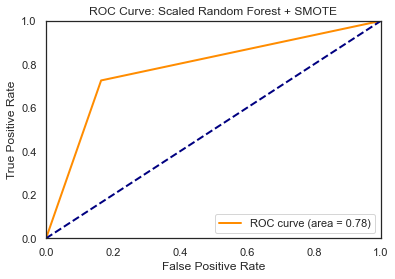

In [197]:
modelRF_scaled2 = RandomForestClassifier(max_depth = 10)
modelRF_scaled2.fit(X_train2_smote, y_train2_smote)

y_predictRF_scaled2 = modelRF_scaled2.predict(X_test2)

class_model_summary('Scaled Random Forest + SMOTE', y_test2, y_predictRF_scaled2)

In [198]:
cross_val_score(modelRF_scaled2, X_test2, y_test2, cv=5).mean()

0.8483985925627063

In [215]:
ft_imp_rfos = pd.DataFrame(data = modelRF_scaled2.feature_importances_, index= dftree.drop(['RainTomorrow'], axis = 1).columns)
ft_imp_rfos.sort_values(by= 0, ascending = False)

,0
Humidity3pm,0.293118
Rainfall,0.177824
Humidity9am,0.074202
RainToday,0.070009
WindGustSpeed,0.068007
Pressure3pm,0.059194
Pressure9am,0.054416
Temp3pm,0.038191
WindSpeed3pm,0.025270
MaxTemp,0.024418


Text(0, 0.5, 'Feature')

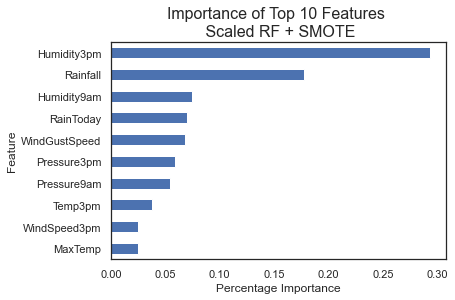

In [222]:
ft_imp_rfos_top = ft_imp_rfos[ft_imp_rfos[0] > 0.023].sort_values(by=0)

ft_imp_rfos_top.plot(kind = 'barh', legend = False)
plt.title('Importance of Top 10 Features \n Scaled RF + SMOTE', size = 16)
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')

# Scaled RF + SMOTE is the best model (especially for recall), so let's do some hyperparameter tuning

In [303]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [50, 87, 125, 162, 200], 'max_depth': [1, 10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [304]:
rf_random = RandomizedSearchCV(estimator = modelRF_scaled2, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2_smote, y_train2_smote)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 23.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 10, 20, 30, 40, 50,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 87, 125, 162,
                                                         200]},
                   random_state=42, verbose=2)

In [305]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 50}

In [307]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {
    'max_depth': [50, 75, 100],
    'min_samples_split': [2, 3],
    'n_estimators': [200, 250, 300]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = modelRF_scaled2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 5)

In [310]:
grid_search.fit(X_train2_smote, y_train2_smote)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  54 | elapsed: 18.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 18.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [50, 75, 100],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 250, 300]},
             verbose=5)

In [311]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=50, n_estimators=300)

Accuracy: 0.84547203 
 
Confusion Matrix: 
[[16636  2042]
 [ 1654  3586]]
 
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     18678
         1.0       0.64      0.68      0.66      5240

    accuracy                           0.85     23918
   macro avg       0.77      0.79      0.78     23918
weighted avg       0.85      0.85      0.85     23918

Manually do the cross-validation score please


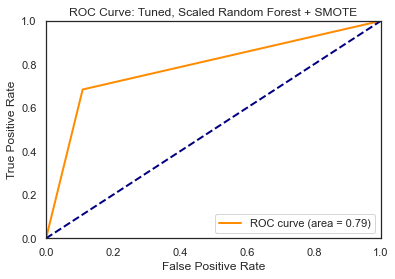

In [312]:
# Use best params for another RF model

best_RF = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth = 50, random_state=12321)
best_RF.fit(X_train2_smote, y_train2_smote)

y_predict_best_RF = best_RF.predict(X_test2)

class_model_summary('Tuned, Scaled Random Forest + SMOTE', y_test2, y_predict_best_RF)

In [313]:
cross_val_score(best_RF, X_test2, y_test2, cv=5).mean()

0.8524120841161947

In [435]:
# Check for overfitting
y_train_predict_best_RF = best_RF.predict(X_train2)

print('Training set score: {:.4f}'.format(accuracy_score(y_train2, y_train_predict_best_RF)))

print('Test set score: {:.4f}'.format(accuracy_score(y_test2, y_predict_best_RF)))

Training set score: 0.7806
Test set score: 0.8455


In [316]:
ft_imp_best = pd.DataFrame(data = best_RF.feature_importances_, index= dftree.drop(['RainTomorrow'], axis = 1).columns)
ft_imp_best.sort_values(by= 0, ascending = False)

,0
Humidity3pm,0.182312
Rainfall,0.097000
WindGustSpeed,0.071668
Humidity9am,0.065606
Pressure3pm,0.063484
Pressure9am,0.057086
Temp3pm,0.049943
Month,0.042831
MinTemp,0.042690
WindSpeed3pm,0.042466


Text(0, 0.5, 'Feature')

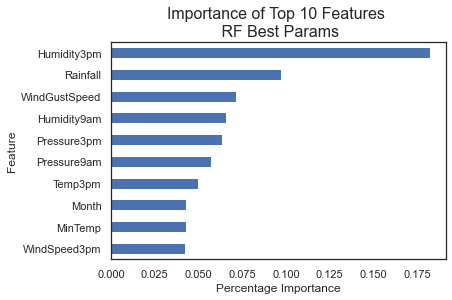

In [317]:
ft_imp_best_top = ft_imp_best[ft_imp_best[0] > 0.042].sort_values(by=0)

ft_imp_best_top.plot(kind = 'barh', legend = False)
plt.title('Importance of Top 10 Features \n RF Best Params', size = 16)
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')

## Try XGBoost, but I predict less accuracy, as outliers have not been removed and outliers can strongly affect the result

In [237]:
import xgboost as xgb

dftree_xgb =xgb.XGBClassifier(random_state=12321,learning_rate=0.01)

dftree_xgb.fit(X_train2, y_train2)
dftree_xgb.score(X_test2, y_test2)

0.8514507901998495

In [238]:
dftree_xgb.score(X_train2, y_train2)
# Not overfitted!

0.8541893134877498

In [239]:
y_predict_xgb = dftree_xgb.predict(X_test2)

Accuracy: 0.85145079 
 
Confusion Matrix: 
[[17840   838]
 [ 2715  2525]]
 
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     18678
         1.0       0.75      0.48      0.59      5240

    accuracy                           0.85     23918
   macro avg       0.81      0.72      0.75     23918
weighted avg       0.84      0.85      0.84     23918

Manually do the cross-validation score please


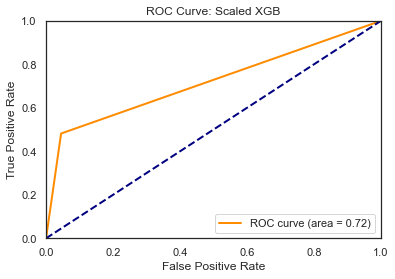

In [240]:
class_model_summary('Scaled XGB', y_test2, y_predict_xgb)

In [241]:
cross_val_score(dftree_xgb, X_test2, y_test2, cv=5).mean()

0.8502381972943474

In [218]:
ft_imp_xgb = pd.DataFrame(data = dftree_xgb.feature_importances_, index= dftree.drop(['RainTomorrow'], axis = 1).columns)
ft_imp_xgb.sort_values(by= 0, ascending = False)

,0
Humidity3pm,0.484078
WindGustSpeed,0.109475
Pressure3pm,0.040897
Rainfall,0.038417
WindDir9am_N,0.026725
WindDir3pm_NE,0.026169
Temp3pm,0.021967
WindDir3pm_NNW,0.021179
Humidity9am,0.018661
MaxTemp,0.016769


Text(0, 0.5, 'Feature')

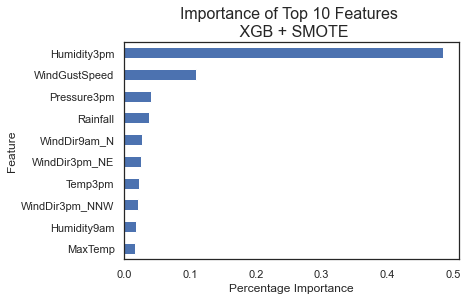

In [223]:
ft_imp_xgb_top = ft_imp_xgb[ft_imp_xgb[0] > 0.0165].sort_values(by=0)

ft_imp_xgb_top.plot(kind = 'barh', legend = False)
plt.title('Importance of Top 10 Features \n XGB + SMOTE', size = 16)
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')

### 3pm features are always worth more than 9am features, Humidity is clearly the most important factor behind rainfall the next day, with Rainfall being on average the next highest

## Try a non-tree, like a simple logreg

In [244]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear')

logreg.fit(X_train2, y_train2)

for col in zip(X_train2.columns, logreg.coef_[0]):
    print('{:<20s}  {:+.03f}'.format(col[0], col[1]))

MinTemp               +1.402
MaxTemp               -0.638
Rainfall              +2.580
WindGustSpeed         +7.730
WindSpeed9am          -0.968
WindSpeed3pm          -3.327
Humidity9am           +0.338
Humidity3pm           +6.561
Pressure9am           +7.219
Pressure3pm           -11.067
Temp9am               -0.002
Temp3pm               -1.025
RainToday             +0.514
Month                 +0.055
WindGustDir_ENE       -0.111
WindGustDir_ESE       +0.069
WindGustDir_N         -0.097
WindGustDir_NE        -0.318
WindGustDir_NNE       -0.286
WindGustDir_NNW       -0.093
WindGustDir_NW        -0.075
WindGustDir_S         +0.021
WindGustDir_SE        +0.131
WindGustDir_SSE       +0.076
WindGustDir_SSW       -0.054
WindGustDir_SW        +0.090
WindGustDir_W         -0.001
WindGustDir_WNW       -0.052
WindGustDir_WSW       +0.068
WindDir9am_ENE        +0.303
WindDir9am_ESE        -0.129
WindDir9am_N          +0.218
WindDir9am_NE         +0.319
WindDir9am_NNE        +0.456
WindDir9am_NN

Accuracy: 0.85028012 
 
Confusion Matrix: 
[[17709   969]
 [ 2612  2628]]
 
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     18678
         1.0       0.73      0.50      0.59      5240

    accuracy                           0.85     23918
   macro avg       0.80      0.72      0.75     23918
weighted avg       0.84      0.85      0.84     23918

Manually do the cross-validation score please


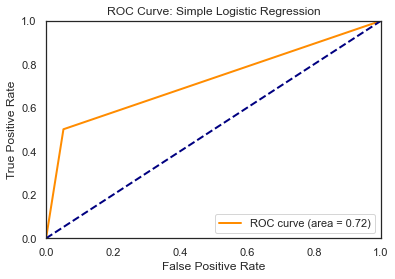

In [245]:
y_predict_log = logreg.predict(X_test2)

class_model_summary('Simple Logistic Regression', y_test2, y_predict_log)

In [246]:
cross_val_score(logreg, X_test2, y_test2, cv=5).mean()

0.8481895712029155

In [251]:
logreg_fimp = list(zip(X_train2.columns, logreg.coef_[0]))

In [281]:
logreg_fimp_df = pd.DataFrame(data = logreg_fimp ,columns=['Feature','Coefficient'])
logreg_fimp_df.sort_values(by = 'Coefficient', ascending = False)

logreg_fimp_df.set_index('Feature', inplace = True)

In [288]:
logreg_fimp_df

,Coefficient
Feature,
MinTemp,1.401865
MaxTemp,-0.637578
Rainfall,2.580358
WindGustSpeed,7.730089
WindSpeed9am,-0.968214
WindSpeed3pm,-3.327254
Humidity9am,0.338314
Humidity3pm,6.560523
Pressure9am,7.218760


In [256]:
#logreg_fimp_df['Coefficient'] = abs(logreg_fimp_df['Coefficient'])

In [269]:
# logsorted = logreg_fimp_df.sort_values(by = 'Coefficient', ascending = False)
# logsorted.set_index('Feature', inplace = True)

Text(0, 0.5, 'Feature')

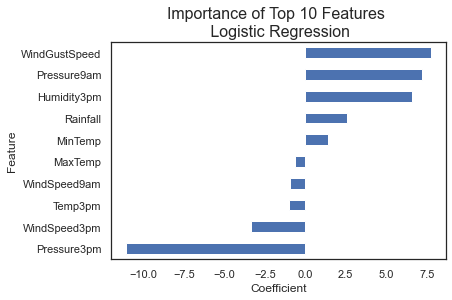

In [287]:
ft_imp_logreg_top = logreg_fimp_df[(logreg_fimp_df['Coefficient'] > 0.6) | (logreg_fimp_df['Coefficient'] < -0.6)].sort_values(by='Coefficient')

ft_imp_logreg_top.plot(kind = 'barh', legend = False)
plt.title('Importance of Top 10 Features \n Logistic Regression', size = 16)
plt.xlabel('Coefficient')
plt.ylabel('Feature')

## ROC comparisons

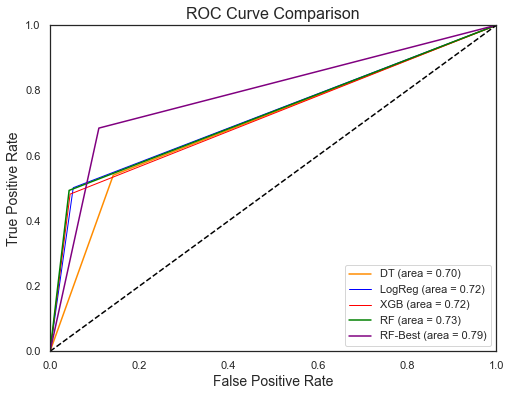

In [430]:
# Decision Tree
fprdt, tprdt, _ = metrics.roc_curve(y_test, y_predictDT)
roc_aucdt = metrics.auc(fprdt, tprdt)

plt.figure(figsize = (8,6))
lw = 1.5
plt.plot(fprdt, tprdt, color='darkorange', lw = lw, label = 'DT (area = %0.2f)' % roc_aucdt)

# LogReg
fprlr, tprlr, _ = metrics.roc_curve(y_test2, y_predict_log)
roc_auclr = metrics.auc(fprlr, tprlr)

lw = 1
plt.plot(fprlr, tprlr, color='blue', lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)


# XGB
fprxgb, tprxgb, _ = metrics.roc_curve(y_test2, y_predict_xgb)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

lw = 1
plt.plot(fprxgb, tprxgb, color='red', lw = lw, label = 'XGB (area = %0.2f)' % roc_aucxgb)


# RF normal
fprrf, tprrf, _ = metrics.roc_curve(y_test, y_predictRF)
roc_aucrf = metrics.auc(fprrf, tprrf)

lw = 1.5
plt.plot(fprrf, tprrf, color='green', lw = lw, label = 'RF (area = %0.2f)' % roc_aucrf)


# RF best
fprrf2, tprrf2, _ = metrics.roc_curve(y_test2, y_predict_best_RF)
roc_aucrf2 = metrics.auc(fprrf2, tprrf2)

lw = 1.5
plt.plot(fprrf2, tprrf2, color='purple', lw = lw, label = 'RF-Best (area = %0.2f)' % roc_aucrf2)


plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC Curve Comparison', size = 16)
plt.legend(loc = "lower right")
plt.show()

# Finally, make the inland model and coastal model to compare - use our best model so far, Random Forest with param tuning

In [320]:
dftree_coast = dftree

In [319]:
dftree_raw = pd.read_csv("weatherAUS_coast.csv")

In [321]:
dftree_coast['Coastal'] = dftree_raw['Coastal']

In [330]:
dftree

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Coastal
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,0,0
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,0
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,0,0
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,0,1,0,0


In [334]:
dftree_inland = dftree[dftree['Coastal']== 0]
dftree_coast = dftree[dftree['Coastal']== 1]

([<matplotlib.axis.XTick at 0x1e3b462df08>,
 [Text(0, 0, 'No Rain'), Text(0, 0, 'Rain')])

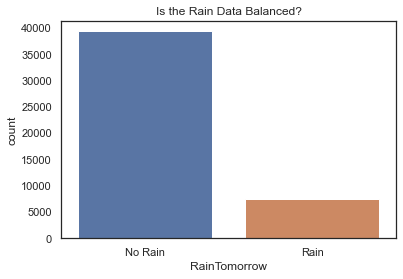

In [335]:
sns.countplot(x = 'RainTomorrow', data = dftree_inland)
plt.title('Is the Rain Data Balanced?')
plt.xticks([0,1],["No Rain","Rain"])

([<matplotlib.axis.XTick at 0x1e3b467b948>,
 [Text(0, 0, 'No Rain'), Text(0, 0, 'Rain')])

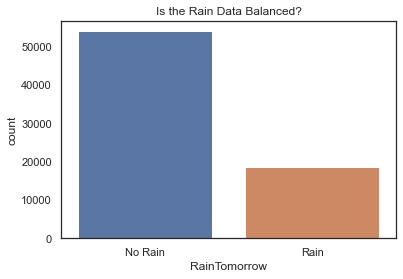

In [336]:
sns.countplot(x = 'RainTomorrow', data = dftree_coast)
plt.title('Is the Rain Data Balanced?')
plt.xticks([0,1],["No Rain","Rain"])

### Train Inland model

In [349]:
dftree_inland = dftree[dftree['Coastal']== 1]

In [350]:
dftree_coast = dftree[dftree['Coastal']== 0]

In [345]:
dftree_inland

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Coastal
8927,16.1,31.4,0.0,54.0,7.0,37.0,51.0,58.0,1005.9,1002.3,...,0,0,0,0,0,0,0,0,0,1
8928,22.8,24.7,0.0,56.0,35.0,15.0,68.0,67.0,1010.9,1011.4,...,0,1,0,0,0,0,0,0,0,1
8929,20.0,24.1,4.6,35.0,20.0,19.0,70.0,59.0,1019.3,1018.8,...,0,0,0,0,0,0,0,0,0,1
8930,14.8,25.0,0.8,24.0,7.0,17.0,62.0,45.0,1019.5,1017.0,...,0,0,0,0,0,0,0,0,0,1
8931,15.5,27.3,0.0,41.0,7.0,30.0,54.0,62.0,1015.7,1012.7,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,19.3,33.4,0.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,...,0,0,0,0,0,0,0,0,0,1
139109,21.2,32.6,0.0,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,...,0,0,1,0,0,0,0,0,0,1
139110,20.7,32.8,0.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,...,0,0,0,0,0,0,1,0,0,1
139111,19.5,31.8,0.0,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,...,0,0,0,0,0,0,0,0,0,1


In [351]:
# Drop coadtal column in both dataframes, no longer needed
dftree_inland.drop('Coastal', axis= 1, inplace = True)

In [352]:
dftree_inland

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8927,16.1,31.4,0.0,54.0,7.0,37.0,51.0,58.0,1005.9,1002.3,...,0,0,0,0,0,0,0,0,0,0
8928,22.8,24.7,0.0,56.0,35.0,15.0,68.0,67.0,1010.9,1011.4,...,0,0,1,0,0,0,0,0,0,0
8929,20.0,24.1,4.6,35.0,20.0,19.0,70.0,59.0,1019.3,1018.8,...,0,0,0,0,0,0,0,0,0,0
8930,14.8,25.0,0.8,24.0,7.0,17.0,62.0,45.0,1019.5,1017.0,...,0,0,0,0,0,0,0,0,0,0
8931,15.5,27.3,0.0,41.0,7.0,30.0,54.0,62.0,1015.7,1012.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,19.3,33.4,0.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,...,0,0,0,0,0,0,0,0,0,0
139109,21.2,32.6,0.0,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,...,0,0,0,1,0,0,0,0,0,0
139110,20.7,32.8,0.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,...,0,0,0,0,0,0,0,1,0,0
139111,19.5,31.8,0.0,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,...,1,0,0,0,0,0,0,0,0,0


In [353]:
dftree_coast.drop('Coastal', axis= 1, inplace = True)

C:\Users\wibby\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [369]:
target_in = dftree_inland['RainTomorrow']
features_in = dftree_inland.drop(['RainTomorrow'], axis = 1)

X_trainin, X_testin, y_trainin, y_testin = train_test_split(features_in, target_in, test_size = 0.3, random_state = 12321)

In [370]:
oversample = SMOTE()

X_trainin_smote, y_trainin_smote = oversample.fit_resample(X_trainin, y_trainin)

Accuracy: 0.83224860 
 
Confusion Matrix: 
[[14694  1499]
 [ 2161  3464]]
 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     16193
           1       0.70      0.62      0.65      5625

    accuracy                           0.83     21818
   macro avg       0.78      0.76      0.77     21818
weighted avg       0.83      0.83      0.83     21818

Manually do the cross-validation score please


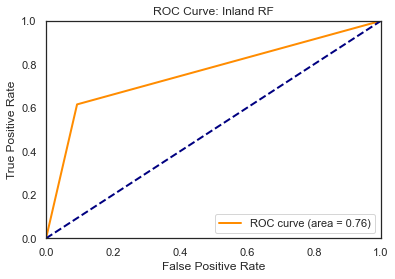

In [371]:
inland_RF = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth = 50, random_state=12321)
inland_RF.fit(X_trainin_smote, y_trainin_smote)

y_predict_inland = inland_RF.predict(X_testin)

class_model_summary('Inland RF', y_testin, y_predict_inland)

In [372]:
cross_val_score(inland_RF, X_testin, y_testin, cv=5).mean()

0.8304156819921206

### Train Coastal model

In [373]:
target_co = dftree_inland['RainTomorrow']
features_co = dftree_inland.drop(['RainTomorrow'], axis = 1)

X_trainco, X_testco, y_trainco, y_testco = train_test_split(features_co, target_co, test_size = 0.3, random_state = 12321)

In [374]:
oversample = SMOTE()

X_trainco_smote, y_trainco_smote = oversample.fit_resample(X_trainco, y_trainco)

Accuracy: 0.83018608 
 
Confusion Matrix: 
[[14659  1534]
 [ 2171  3454]]
 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     16193
           1       0.69      0.61      0.65      5625

    accuracy                           0.83     21818
   macro avg       0.78      0.76      0.77     21818
weighted avg       0.82      0.83      0.83     21818

Manually do the cross-validation score please


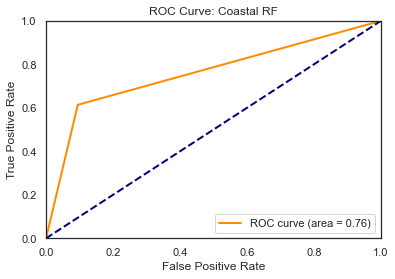

In [375]:
coastal_RF = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth = 50, random_state=12321)
coastal_RF.fit(X_trainco_smote, y_trainco_smote)

y_predict_coastal = coastal_RF.predict(X_testco)

class_model_summary('Coastal RF', y_testco, y_predict_coastal)

In [376]:
cross_val_score(coastal_RF, X_testco, y_testco, cv=5).mean()

0.8304156819921206

### Test inland model on coastal data

Accuracy: 0.83224860 
 
Confusion Matrix: 
[[14694  1499]
 [ 2161  3464]]
 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     16193
           1       0.70      0.62      0.65      5625

    accuracy                           0.83     21818
   macro avg       0.78      0.76      0.77     21818
weighted avg       0.83      0.83      0.83     21818

Manually do the cross-validation score please


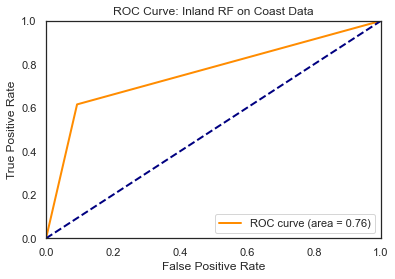

In [377]:
y_predict_inoncoastal = inland_RF.predict(X_testco)

class_model_summary('Inland RF on Coast Data', y_testco, y_predict_inoncoastal)

Accuracy: 0.83018608 
 
Confusion Matrix: 
[[14659  1534]
 [ 2171  3454]]
 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     16193
           1       0.69      0.61      0.65      5625

    accuracy                           0.83     21818
   macro avg       0.78      0.76      0.77     21818
weighted avg       0.82      0.83      0.83     21818

Manually do the cross-validation score please


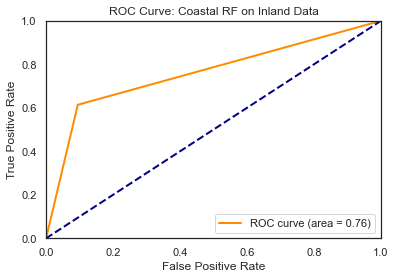

In [378]:
y_predict_cooninland = coastal_RF.predict(X_testin)

class_model_summary('Coastal RF on Inland Data', y_testin, y_predict_cooninland)